# Walid Alashry - Mans G1

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def eclidean_distances(X, row_index):
    distances = np.linalg.norm((X - X[row_index]), axis=1)
    return distances

In [4]:
def full_eclid(X):
    m = X.shape[0]
    ecl_dists = np.zeros((m,m))
    for row_index in range(m):
        ecl_dists[:,row_index] = eclidean_distances(X, row_index)
    return ecl_dists

In [15]:
def dbscan(X, eps=0.5, min_points=3):
    
    m = X.shape[0]
    ecl_dists = full_eclid(X)
    
    #core points:
    is_cluster_point = (ecl_dists <= eps)
    no_points_per_cluster  = np.sum(is_cluster_point,axis=0)
    is_core_point = (no_points_per_cluster >= min_points)
    
    #merging core points:
    core_interaction = (np.sum(is_cluster_point[:,is_core_point],axis=1))
    while np.sum(core_interaction > 1) > 0 :
        max_interaction_point_index = np.argmax(core_interaction == np.max(core_interaction))
        interacted_clusters =  np.where(is_cluster_point[max_interaction_point_index, :] > 0)[0]
        
        #update first instance of the core interactions and delete the other clusters
        is_cluster_point[:,interacted_clusters[0]] = (np.sum(is_cluster_point[:,interacted_clusters], axis=1)>0)
        is_cluster_point = np.delete(is_cluster_point,interacted_clusters[1:],1)
        
        #calcualte for the new set and check the stop condition:
        no_points_per_cluster  = np.sum(is_cluster_point,axis=0)
        is_core_point = (no_points_per_cluster >= min_points)
        core_interaction = (np.sum(is_cluster_point[:,is_core_point],axis=1))
        
    #merging border points:
    dense_cores_indicies = np.where(is_core_point)[0]
    dense_cores = is_cluster_point[:,dense_cores_indicies]
    sparse_cores = np.delete(is_cluster_point, dense_cores_indicies, 1)
    for core_index in dense_cores_indicies:
        merged_with_dense = sparse_cores + is_cluster_point[:,core_index].reshape((m,1))
        merged_point_indices = np.where(np.sum(merged_with_dense>1, axis=0)>0)[0]
        for point in merged_point_indices:
            dense_cores[:,core_index] = (merged_with_dense[:,point]>0)
        
    dense_cores = np.c_[~np.any(dense_cores, axis=1), dense_cores]
    labels = np.argmax(dense_cores, axis=1)
    labels = labels - 1    #outliers=-1
    
    
    return labels
        

In [16]:
X = np.array([[1,2],
            [3,4],
            [2.5,4],
            [1.5,2.5],
            [3,5],
            [2.8,4.5],
            [2.5,4.5],
            [1.2,2.5],
            [1,3],
            [1,5],
            [1,2.5],
            [5,6],
            [4,3]])
pd.DataFrame(full_eclid(X))

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.000000,2.828427,2.500000,0.707107,3.605551,3.080584,2.915476,0.538516,1.000000,3.000000,0.500000,5.656854,3.162278
1,2.828427,0.000000,0.500000,2.121320,1.000000,0.538516,0.707107,2.343075,2.236068,2.236068,2.500000,2.828427,1.414214
2,2.500000,0.500000,0.000000,1.802776,1.118034,0.583095,0.500000,1.984943,1.802776,1.802776,2.121320,3.201562,1.802776
3,0.707107,2.121320,1.802776,0.000000,2.915476,2.385372,2.236068,0.300000,0.707107,2.549510,0.500000,4.949747,2.549510
4,3.605551,1.000000,1.118034,2.915476,0.000000,0.538516,0.707107,3.080584,2.828427,2.000000,3.201562,2.236068,2.236068
5,3.080584,0.538516,0.583095,2.385372,0.538516,0.000000,0.300000,2.561250,2.343075,1.868154,2.690725,2.662705,1.920937
6,2.915476,0.707107,0.500000,2.236068,0.707107,0.300000,0.000000,2.385372,2.121320,1.581139,2.500000,2.915476,2.121320
7,0.538516,2.343075,1.984943,0.300000,3.080584,2.561250,2.385372,0.000000,0.538516,2.507987,0.200000,5.166237,2.844293
8,1.000000,2.236068,1.802776,0.707107,2.828427,2.343075,2.121320,0.538516,0.000000,2.000000,0.500000,5.000000,3.000000
9,3.000000,2.236068,1.802776,2.549510,2.000000,1.868154,1.581139,2.507987,2.000000,0.000000,2.500000,4.123106,3.605551


In [17]:
labels = dbscan(X, eps=0.7, min_points=3)

<AxesSubplot:xlabel='x', ylabel='y'>

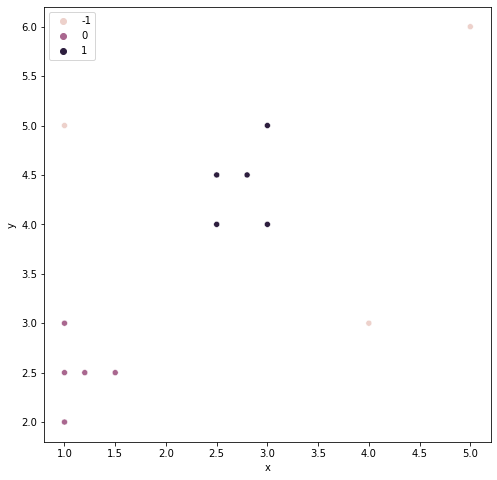

In [18]:
df = pd.DataFrame(X, columns = ['x', 'y'])
plt.figure(figsize=(8,8))
sns.scatterplot(data = df, x='x', y='y', hue=labels)

In [19]:
#test on sklearn data:
from sklearn.datasets import make_circles,make_moons, make_blobs
from sklearn.preprocessing import StandardScaler

n_samples = 1500
dataset1 = make_circles(n_samples=n_samples, factor=.5, noise=.05)
dataset1= pd.DataFrame(dataset1[0])
dataset2 = make_moons(n_samples=n_samples, noise=.05)
dataset2= pd.DataFrame(dataset2[0])

dataset3 = make_blobs(n_samples=n_samples, random_state=8)
dataset3=pd.DataFrame(dataset3[0])

dataset1.columns = ['x', 'y']
dataset2.columns = ['x', 'y']
dataset3.columns = ['x', 'y']





z = StandardScaler()
dataset1[["x","y"]] = z.fit_transform(dataset1)
dataset2[["x","y"]] = z.fit_transform(dataset2)
dataset3[["x","y"]] = z.fit_transform(dataset3)





<AxesSubplot:xlabel='x', ylabel='y'>

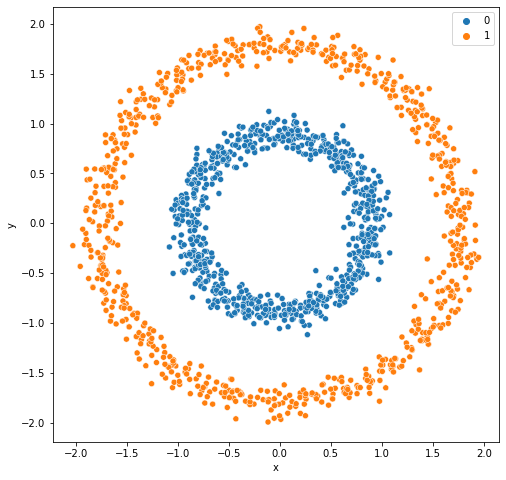

In [20]:
X = z.fit_transform(dataset1)
labels = dbscan(X, eps=0.3, min_points=25)
df = pd.DataFrame(X, columns = ['x', 'y'])
plt.figure(figsize=(8,8))
sns.scatterplot(data = df, x='x', y='y', hue=labels)

<AxesSubplot:xlabel='x', ylabel='y'>

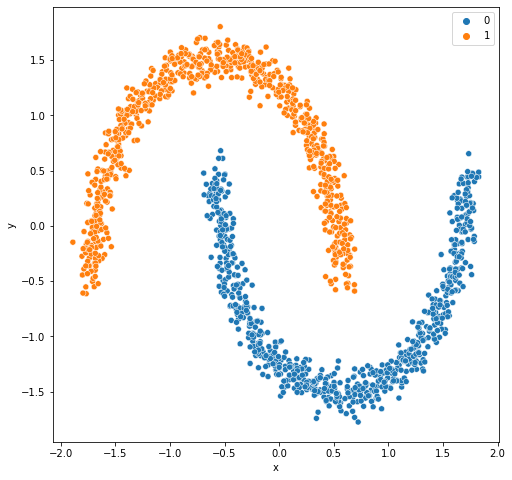

In [21]:
X = z.fit_transform(dataset2)
labels = dbscan(X, eps=0.3, min_points=25)
df = pd.DataFrame(X, columns = ['x', 'y'])
plt.figure(figsize=(8,8))
sns.scatterplot(data = df, x='x', y='y', hue=labels)

<AxesSubplot:xlabel='x', ylabel='y'>

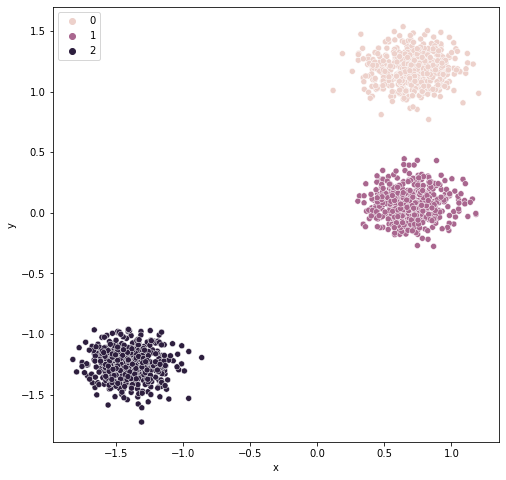

In [22]:
X = z.fit_transform(dataset3)
labels = dbscan(X, eps=0.3, min_points=25)
df = pd.DataFrame(X, columns = ['x', 'y'])
plt.figure(figsize=(8,8))
sns.scatterplot(data = df, x='x', y='y', hue=labels)